In [28]:
%matplotlib inline
from matplotlib import animation, rc
from IPython.display import HTML
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [29]:
#Particle Generation
#n_1 is the no of particles in an area of radius (del)e
def particles(outer_radius, length, e, n_1):
    
    x = []
    y = []
    z = []
    theta = []
    rad = []
    
    length = int(length)
    
    #no of layers - len_per
    n_l = int(length/e)
    
    #no of circles in a single layer
    n_c_s_l = int(outer_radius/e)
    
    for o in range(n_l):
        z_x = e * o
        for i in range(n_c_s_l):
            radius = e + i * e
            #no of particles per circle
            n_p_c = 6 * (i + 1) - 3 
            del_theta = 2 * np.pi / n_p_c
            for j in range(n_p_c):
                x.append(radius * np.cos(del_theta * (j + 1)))
                y.append(radius * np.sin(del_theta * (j + 1)))
                z.append(z_x) 
                theta.append(del_theta * (j + 1))
                rad.append(radius)
    return x, y, z, theta, rad

   

In [30]:
#Velocity function, forward vel = k1 * (outer_radius ** 2 - radius ** 2), omega = k2 * (outer_radius ** 2 - radius ** 2)
#k1 and k2 are the properties dependent on the flow and wall material
def vel_new_coord(k1, k2, time, length_of_the_box, outer_radius):
    global x
    global y
    global z
    global radius
    global theta
    ei = len(z)
    for i in range(ei):
        f_v = k1 * (outer_radius ** 2 - radius[i] ** 2)
        r_v = k2 * (outer_radius ** 2 - radius[i] ** 2)/radius[i]
        x[i] = radius[i] * np.cos(r_v * time + theta[i])
        y[i] = radius[i] * np.sin(r_v * time + theta[i])
        z[i] = (z[i] + f_v * time)%length        
        """
        if z[i] > length_of_the_box:
            z[i] = 0
        else:
            z[i] = (z[i] + f_v * time)
        """
        theta[i] = (theta[i] + r_v * time)%(2 * np.pi) 
    return

#Total Velocity

def vel_particles(k1, k2, outer_radius):
    global radius
    v = []
    ei = len(radius)
    for i in range(ei):
        f_v = k1 * (outer_radius ** 2 - radius[i] ** 2)
        r_v = k2 * (outer_radius ** 2 - radius[i] ** 2)/radius[i]
        v.append((f_v ** 2 + r_v ** 2) ** 0.5)
    return v, min(v), max(v)

In [31]:
#BOUNDARY CONDITIONS 
#Adding Temperature Boundary Condition on the face
def temperature_face(t_1):
    global z
    global temperature
    z_min = min(z)
    c = len(z)
    for i in range(c):
        if z[i] == z_min:
            temperature[i] = t_1
    return

#Adding Temperature Boundary Condition on the surface
def temperature_surface(t_1, t_2, outer_radius, length):
    global radius
    global z
    global temperature
    c = len(radius)
    k = (t_2 - t_1)/length
    for i in range(c):
        if radius[i] == outer_radius:
            temperature[i] = k * z[i] + t_1
    return
            

In [40]:
#INITIALIZATION - Adding Initial temperature Conditions

#Will add a semicircular arc 

def initialize_temp(t_3, t_f):
    global temperature
    global radius
    global z
    global vel_min
    global vel_max
    ei = len(z)
    #Temperature condition for the non-lit particles intially
    for i in range(ei):
        if radius[i] != outer_radius:
            temperature[i] = t_3
    
    #Temperature condition for the lit particles - semicircular
    #The flame would be near the center and velocity in a range
    a = (vel_min + vel_max)/4
    b = (vel_min + vel_max) * 3/4
    c = (min(z) + max(z))/4
    d = (max(z) + min(z)) * 3/4
    for i in range(ei):
        if vel[i] <= b and vel[i] >= a and z[i] >= c and z[i] <= d:
            if theta[i] <= 1.5 * np.pi and theta[i] >= 0.25 * np.pi:
                temperature[i] = t_f
    
    return
    
 

In [41]:
x = 0
y = 0
z = 0
vel = 0
vel_min = 0
vel_max = 0
theta = 0
radius = 0
length = 2
outer_radius = 1
k1 = 0.1
k2 = 0.01
t_f = 1000
t_3 = 273
#Creating the particles
x, y, z, theta, radius = particles(outer_radius, length, 0.2, 3)
vel, vel_min, vel_max = vel_particles(k1, k2, outer_radius)

#Adding the temperature profile
t_1 = 273
t_2 = 600
temperature = np.copy(z)
temperature_face(t_1)
temperature_surface(t_1, t_2, outer_radius, length)
initialize_temp(t_3, t_f)
print(temperature)
#print(min(vel), max(vel))
#plt.scatter(x, y)
#plt.show()

[ 273.   273.   273.   273.   273.   273.   273.   273.   273.   273.
  273.   273.   273.   273.   273.   273.   273.   273.   273.   273.
  273.   273.   273.   273.   273.   273.   273.   273.   273.   273.
  273.   273.   273.   273.   273.   273.   273.   273.   273.   273.
  273.   273.   273.   273.   273.   273.   273.   273.   273.   273.
  273.   273.   273.   273.   273.   273.   273.   273.   273.   273.
  273.   273.   273.   273.   273.   273.   273.   273.   273.   273.
  273.   273.   273.   273.   273.   273.   273.   273.   273.   273.
  273.   273.   273.   273.   273.   273.   273.   273.   273.   273.
  273.   273.   273.   273.   273.   273.   273.   273.   273.   273.
  273.   273.   273.   273.   273.   273.   273.   273.   273.   273.
  273.   273.   273.   273.   273.   273.   273.   273.   273.   273.
  273.   273.   273.   305.7  305.7  305.7  305.7  305.7  305.7  305.7
  305.7  305.7  305.7  305.7  305.7  305.7  305.7  305.7  305.7  305.7
  305.7  305.7  30

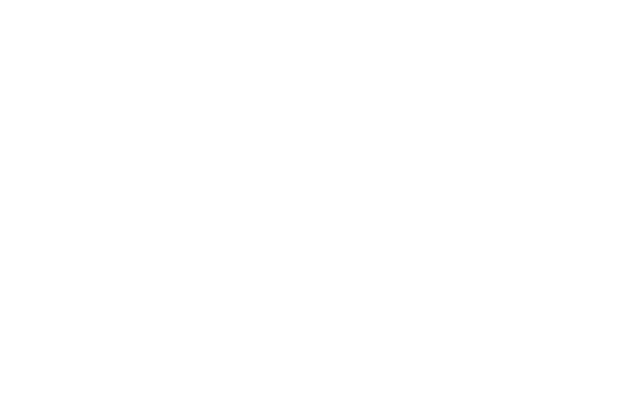

In [39]:
#Animations
grid_size = 1


fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1], projection='3d')
ax.axis('off')
ax.set_xlim((-grid_size, grid_size))
ax.set_ylim((-grid_size, grid_size))
ax.set_zlim((0, length + 1))

line1, = ax.plot([], [], [], 'b*')

ax.view_init(90, 180)

def init():
    line1.set_data([], [])
    line1.set_3d_properties([])
    return line1, 

def animate(i):
    vel_new_coord(k1, k2, 1, length, outer_radius)    
    line1.set_data(x, y)
    line1.set_3d_properties(z)
    #ax.view_init(2*i+60, 3 * i)
    fig.canvas.draw()
    return line1,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate,init_func = init, frames=100, blit=True)
plt.show()
HTML(anim.to_html5_video())


In [27]:
p = 3.3%3.2
print(p)

0.09999999999999964
